<a href="https://colab.research.google.com/github/abdulazizkomilov/Data-Science/blob/main/Animals_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fastai
import torch

# torch.__version__
# fastai.__version__

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 34.28 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 5.1 MB/s 
     |████████████████████████████████| 9.1 MB 31.9 MB/s 
     |████████████████████████████████| 548 kB 50.6 MB/s 
     |████████████████████████████████| 636 kB 75.2 MB/s 
     |████████████████████████████████| 79 kB 11.4 MB/s 
     |████████████████████████████████| 140 kB 77.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

optional arguments:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID da

In [ ]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Mammal Carnivore Marine_mammal Turtle Shellfish Fish Reptile Amphibian Carnivore Bear Invertebrate Insect Bird Marine_invertebrates Beetle Moths_and_butterflies --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Mammal.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 50154 KB/s, 0 seconds passed
[DOWNLOAD] | File c

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.293130,0.782702,0.763158,00:27


epoch,train_loss,valid_loss,accuracy,time
0,0.977318,0.702801,0.785714,00:26
1,0.739381,0.699119,0.785714,00:25
2,0.520166,0.709726,0.812030,00:29
3,0.373931,0.696617,0.812030,00:37


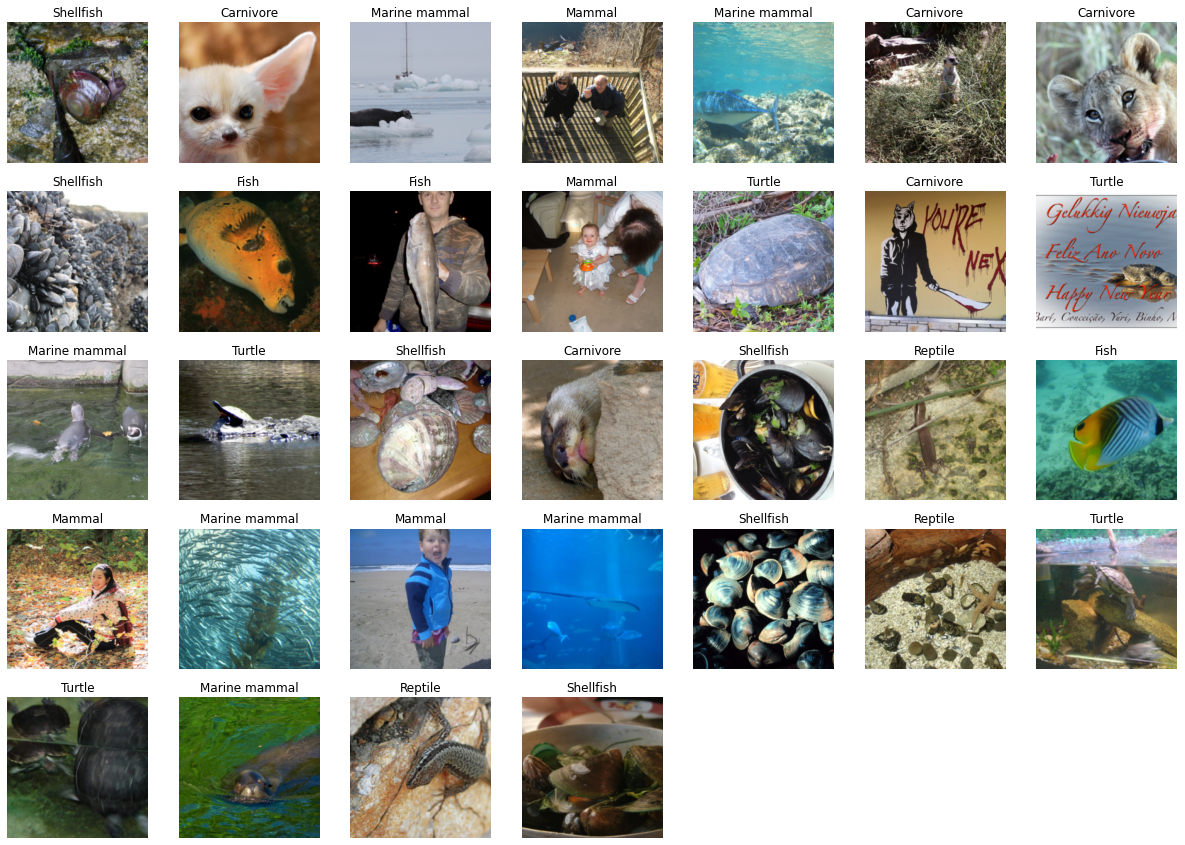

In [ ]:
from numpy.core.fromnumeric import transpose
from fastai.vision.all import *
from ipywidgets import widget

path = Path('train')

transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = transports.dataloaders(path)

dls.train.show_batch(max_n=32)